In [27]:
import pandas as pd

First we can get data either by generating it or by reading it

In [28]:
data = pd.read_csv("data.csv") # This will read in a locally stored file called `data.csv`

The returned object now stored in `data` is a `DataFrame` - This is panda's equivalent of an excel sheet.

In [29]:
type(data)

pandas.core.frame.DataFrame

In [30]:
data

,x,y,z
0,123.154675,86.868598,a
1,83.966671,71.911116,a
2,86.307842,100.100997,a
3,135.927615,102.541512,a
4,147.046954,74.312553,a
...,...,...,...
107,554.121345,440.471173,a
108,540.367018,457.320256,a
109,573.524085,403.506937,a
110,523.626257,415.569872,a


A DataFrame has built in functions we can call to give us information about the data or technical information on itself

In [31]:
data.describe()

,x,y
count,112.000000,112.000000
mean,364.955075,287.293602
std,134.358070,114.785251
min,83.966671,66.526716
25%,284.300521,182.587590
50%,378.083601,302.856110
75%,478.875195,386.486757
max,604.143915,468.087672


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       112 non-null    float64
 1   y       112 non-null    float64
 2   z       112 non-null    object 
dtypes: float64(2), object(1)
memory usage: 2.8+ KB


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

A DataFrame is made of multiple Series. We access a series like we would with a dictonary, with the column name as the key

In [33]:
data["x"]

0      123.154675
1       83.966671
2       86.307842
3      135.927615
4      147.046954
          ...    
107    554.121345
108    540.367018
109    573.524085
110    523.626257
111    604.143915
Name: x, Length: 112, dtype: float64

In [34]:
# Delete a column

del data["z"]

data

,x,y
0,123.154675,86.868598
1,83.966671,71.911116
2,86.307842,100.100997
3,135.927615,102.541512
4,147.046954,74.312553
...,...,...
107,554.121345,440.471173
108,540.367018,457.320256
109,573.524085,403.506937
110,523.626257,415.569872


---

Pandas is better when used with other libaries, right now all we can do is look at it

In [35]:
import seaborn as sns

<Axes: xlabel='x', ylabel='y'>

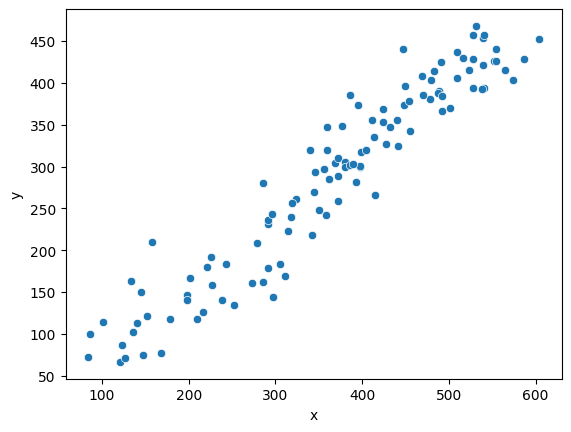

In [36]:
sns.scatterplot(data, x="x",y="y")